In [219]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [93]:
# importing the data from github
insurance=pd.read_csv("https://raw.githubusercontent.com/nnkrishnakumar/Medical_Cost_Personal_Dataset_regression/main/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Change categoical data to numerical data  to pass machine learning model.
* one hot encoding

In [94]:
one_hot_encoding_insurance=pd.get_dummies(insurance)
one_hot_encoding_insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


#Extracting the first five rows to understant the data properly

In [95]:
one_hot_encoding_insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [96]:
X=one_hot_encoding_insurance.drop('charges', axis=1)
y=one_hot_encoding_insurance['charges']

In [97]:
#Check number of dimension of X and y data set.
X.ndim, y.ndim

(2, 1)

In [98]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
# (X_train.shape,X_test.shape,y_train.shape,y_test.shape)


#Model_1 

In [99]:
#Creating model_1
model_1=tf.keras.Sequential([tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(1,input_shape=[2])])
#Compiling model_1
model_1.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
#Fitting the model_1
history=model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8654.3604 - mae: 8654.3604
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7868.1206 - mae: 7868.1206
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7547.4404 - mae: 7547.4404
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7785.7148 - mae: 7785.7148
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7673.5381 - mae: 7673.5381
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7559.2314 - mae: 7559.2314
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7572.4282 - mae: 7572.4282
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7809.5137 - mae: 7809.5137
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7490.2515 - mae: 7490.2515
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7717.4507 - mae: 7717.4507

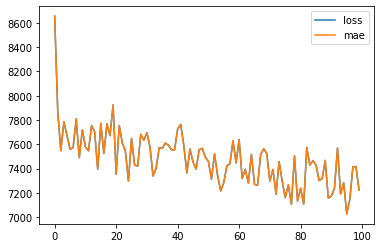

In [100]:
#Visualise the model training graph
pd.DataFrame(history.history).plot()

In [215]:
y_pred=model_1.predict(X_test)
y_pred.ndim,X_test.ndim

(2, 2)

In [228]:
model_1.evaluate(X_train,y_train)

34/34 [==============================] - 0s 1ms/step - loss: 9105.6758 - mae: 9105.6758


[9105.67578125, 9105.67578125]

In [243]:
X_test_1_loss,X_test_1_mae=model_1.evaluate(X_test,y_test)
X_test_1_loss,X_test_1_mae

9/9 [==============================] - 0s 4ms/step - loss: 8980.3232 - mae: 8980.3232


(8980.3232421875, 8980.3232421875)

# Model_2

In [104]:
#Create model_2
model_2= tf.keras.Sequential([tf.keras.layers.Dense(1100),
                              tf.keras.layers.Dense(110),
                              tf.keras.layers.Dense(1,input_shape=[2])])
#compile model_2
model_2.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
#model fitting
model_2.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: nan - mae: nan
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 [==========

In [246]:
# Evaluating model_2:
X_test_2_loss,X_test_2_mae=model_2.evaluate(X_test,y_test)        # Model is complex to learn anything from data, i will use other optimizer, or activation function etc.
X_test_2_loss,X_test_2_mae

9/9 [==============================] - 0s 4ms/step - loss: nan - mae: nan


(nan, nan)

# Model_3

In [250]:
tf.random.set_seed(42)
#Create a model_3
model_3= tf.keras.Sequential([tf.keras.layers.Dense(1100),
                                tf.keras.layers.Dense(110),
                                tf.keras.layers.Dense(1,input_shape=[2])])
#Compile a model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])
#Fit a model_3
history_3= model_3.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 10ms/step - loss: 12517.1699 - mae: 12517.1699
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 8382.7666 - mae: 8382.7666
Epoch 3/100
34/34 [==============================] - 0s 11ms/step - loss: 7461.7026 - mae: 7461.7026
Epoch 4/100
34/34 [==============================] - 0s 11ms/step - loss: 7297.5615 - mae: 7297.5615
Epoch 5/100
34/34 [==============================] - 0s 13ms/step - loss: 7197.0747 - mae: 7197.0747
Epoch 6/100
34/34 [==============================] - 0s 11ms/step - loss: 7081.6631 - mae: 7081.6631
Epoch 7/100
34/34 [==============================] - 0s 13ms/step - loss: 6954.2075 - mae: 6954.2075
Epoch 8/100
34/34 [==============================] - 0s 14ms/step - loss: 6806.1841 - mae: 6806.1841
Epoch 9/100
34/34 [==============================] - 1s 17ms/step - loss: 6646.7495 - mae: 6646.7495
Epoch 10/100
34/34 [==============================] - 0s 13ms/step - loss: 6526.8198 - mae

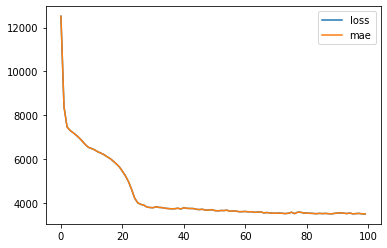

In [251]:
pd.DataFrame(history_3.history).plot()

In [269]:
#Evaluation_3
X_test_3_loss,X_test_3_mae=model_3.evaluate(X_test,y_test)
X_test_3_loss,X_test_3_mae

9/9 [==============================] - 0s 3ms/step - loss: 3158.1726 - mae: 3158.1726


(3158.172607421875, 3158.172607421875)

# Model_4

###Preprocessing Data (Normalization and standardization)

* Normalised -converting the data between 0 and 1.

In [133]:
# # Scaling the feature X and y using MinMaxScaling

# from sklearn.preprocessing import MinMaxScaler
# scale=MinMaxScaler()
# one_hot_encoding_scaled=MinMaxScaler(pd.DataFrame(one_hot_encoding_insurance))
# print(one_hot_encoding_scaled)
# one_hot_encoding_scaled[0]
# X_scaled =one_hot_encoding_insurance_scaled.drop('charges', axis=1)
# y_scaled =one_hot_encoding_insurance_scaled['charges']


In [148]:
#Recalling my dataset
one_hot_encoding_insurance
X=one_hot_encoding_insurance.drop('charges',axis=1)
y=one_hot_encoding_insurance['charges']

In [171]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scale=MinMaxScaler()
# print(scale.fit(one_hot_encoding_insurance))
# one_hot_encoding_insurance_scaled
X_one_hot_encoding_insurance_scaled=scale.fit_transform(X)
y_one_hot_encoding_insurance_scaled=scale.fit_transform(np.array([y]))
y_one_hot_encoding_insurance_scaled

# X_one_hot_encoding_insurance_scaled
# y_one_hot_encoding_insurance_scaled


array([[0., 0., 0., ..., 0., 0., 0.]])

In [173]:
# Extracting the Spliting the data into X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42,test_size=0.2)


In [179]:
tf.random.set_seed(42)
model_4= tf.keras.Sequential([tf.keras.layers.Dense(1100),
                              tf.keras.layers.Dense(110),
                              tf.keras.layers.Dense(1,input_shape=[2])])
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['mae'])
history_4=model_4.fit(X,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


42/42 [==============================] - 1s 5ms/step - loss: 8100.7207 - mae: 8100.7207
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 6375.7959 - mae: 6375.7959
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 5779.7402 - mae: 5779.7402
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 4272.3213 - mae: 4272.3213
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 3941.0308 - mae: 3941.0308
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 4044.6760 - mae: 4044.6760
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 3785.5276 - mae: 3785.5276
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 3827.1040 - mae: 3827.1040
Epoch 9/100
42/42 [==============================] - 0s 5ms/step - loss: 3668.0859 - mae: 3668.0859
Epoch 10/100
42/42 [==============================] - 0s 4ms/step - loss: 3771.9302 - mae: 3771.9302
Epoch 11/10

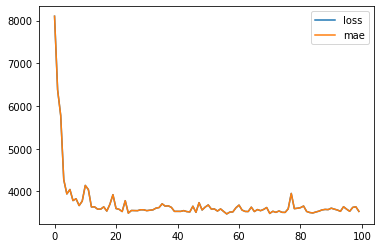

In [185]:
# Visualise mean_absolute_error
pd.DataFrame(history_4.history).plot()

In [265]:
# training evaluation
X_test_4_loss,X_test_4_mae=model_4.evaluate(X_test,y_test)
X_test_4_loss,X_test_4_mae

9/9 [==============================] - 0s 4ms/step - loss: 3474.0901 - mae: 3474.0901


(3474.090087890625, 3474.090087890625)

In [266]:
model_4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 1100)              13200     
                                                                 
 dense_50 (Dense)            (None, 110)               121110    
                                                                 
 dense_51 (Dense)            (None, 1)                 111       
                                                                 
Total params: 134,421
Trainable params: 134,421
Non-trainable params: 0
_________________________________________________________________


# Comparing models

In [270]:
model_result=[["model_1",X_test_1_loss,X_test_1_mae],
              ["model_2",X_test_2_loss,X_test_2_mae],
              ["model_3",X_test_3_loss,X_test_3_mae],
              ["model_4",X_test_4_loss,X_test_4_mae]]
all_result=pd.DataFrame(model_result,columns=['Model','Loss','MAE'])
all_result

,Model,Loss,MAE
0,model_1,8980.323242,8980.323242
1,model_2,NaN,NaN
2,model_3,3158.172607,3158.172607
3,model_4,3474.090088,3474.090088


###**NOTE:** Model_3 is the best model_as we can see: loss is low and MAE is also low in all the four model

#Dowloading the model_3 for production 

In [272]:
model_3.save("best_model.h5")